In [2]:
%matplotlib inline

import my_hashing
import random
import numpy as np
import gzip
import matplotlib.pyplot as plt

First we load the data

In [17]:
f = gzip.open('../genome/reads-aunt_00.fa.gz', 'rt')

genome = []

for x in f:
    if x[0] != '>':
        genome.append(x[:-1])

# print(genome)

Next we create a numpy array that will keep a record of the counts of 21-mers after the hash function.

In [18]:
py_hash_bin = np.zeros(2**28)
klen = 21

for i in genome:
    for j in range(80):
        kmer = i[j : j + klen]
        # print(kmer)
        py_hash_bin[my_hashing.DSA_hash(kmer, 1, 7)] += 1

Now we loop through the data to find the frequency of each frequency. This gives us out frequency-frequency data that we can then plot.

In [19]:
size = len(genome)
N = size*80
frequency_frequency = []

acc = 0
i = 0

while acc < N:
    number = (py_hash_bin == i).sum()
    # print(number, acc, i, N)
    frequency_frequency.append((i, number))
    acc += i*number
    i += 1
    # print(N, acc, i, number)
    
print(frequency_frequency)

[(0, 267088105), (1, 1098910), (2, 47224), (3, 1367), (4, 24), (5, 11), (6, 6), (7, 10), (8, 16), (9, 7), (10, 12), (11, 3), (12, 13), (13, 34), (14, 29), (15, 44), (16, 74), (17, 136), (18, 215), (19, 287), (20, 554), (21, 957), (22, 1347), (23, 2060), (24, 3054), (25, 4122), (26, 5576), (27, 7017), (28, 8834), (29, 10304), (30, 11883), (31, 12540), (32, 13534), (33, 13637), (34, 13552), (35, 12803), (36, 12023), (37, 10979), (38, 10189), (39, 8726), (40, 7743), (41, 6350), (42, 5303), (43, 3941), (44, 3001), (45, 2351), (46, 1739), (47, 1303), (48, 1041), (49, 731), (50, 527), (51, 376), (52, 271), (53, 153), (54, 115), (55, 67), (56, 62), (57, 50), (58, 23), (59, 18), (60, 7), (61, 5), (62, 4), (63, 1), (64, 2), (65, 3), (66, 4), (67, 5), (68, 3), (69, 6), (70, 5), (71, 1), (72, 4), (73, 2), (74, 3), (75, 1), (76, 3), (77, 1), (78, 2), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 0), (88, 0), (89, 1)]


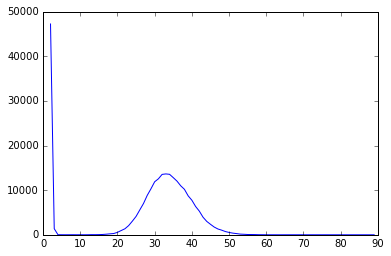

In [20]:
x, y = zip(*frequency_frequency)
plt.plot(x[2:], y[2:])
plt.show()

This plot looks roughly like what we would expect. The peak around a frequency of 32-34 indicates that we have roughly 33x our data taken in the reads.

32.2496769984


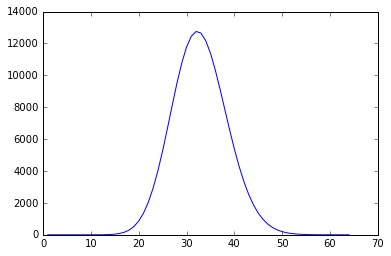

In [5]:
def model(x, kmax, occmax, d):
    a = ((kmax-1)**(kmax-1))/(kmax**kmax)
    b = (kmax**kmax)/(x**x)
    c = kmax - x
    return occmax* a**c * b * d**c

def imax(kmax, d):
    a = ((kmax-1)**(kmax-1))/(kmax**kmax)
    b = np.exp(1)*d
    return 1/(a * b)

print(imax(65, 2))

values = []
for i in range(1, 65):
    values.append(model(i, 65, 7/200, 2))

y = range(1, len(values) + 1)

plt.plot(y,values)
plt.show()

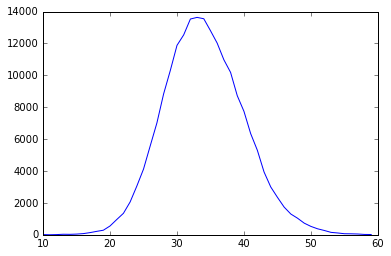

In [22]:
x, y = zip(*frequency_frequency)
plt.plot(x[10:60], y[10:60])
plt.show()